In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import scipy.stats
from scipy.stats import norm, binom, poisson
from dtaidistance import dtw

import json

### Different position of the sun
- right
- behind
- left
- front

### Layered folders, parse into 2d lists of dicts

In [7]:
import os

txt_lists = [[], [], [], []]

for root, dirs, files in os.walk("./Simulations_Sun_Azimuth/route_highway_epoch24_clear-sunset-right"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists[0].append(json_object)
                
for root, dirs, files in os.walk("./Simulations_Sun_Azimuth/route_highway_epoch24_clear-sunset-behind"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists[1].append(json_object)
                
for root, dirs, files in os.walk("./Simulations_Sun_Azimuth/route_highway_epoch24_clear-sunset-left"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists[2].append(json_object)
                
for root, dirs, files in os.walk("./Simulations_Sun_Azimuth/route_highway_epoch24_clear-sunset-front"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists[3].append(json_object)

### Examining results

In [8]:
count_array = []
for txt_list in txt_lists:
    count = 0
    for txt in txt_list:
        if txt['_checkpoint']['records'][0]['status'] == 'Completed':
            count += 1
    count_array.append(count/50)
    
print(count_array)

[1.0, 1.0, 1.0, 1.0]


In [14]:
count_array = []
outOfLane_array = []
for txt_list in txt_lists:
    count = 0
    outOfLane = 0
    for txt in txt_list:
        count += txt['_checkpoint']['records'][0]['scores']['score_route']
        if not txt['_checkpoint']['records'][0]['infractions']['outside_route_lanes']:
                outOfLane += 1
    count_array.append(count/50)
    outOfLane_array.append(outOfLane/50)
print(count_array, outOfLane_array)

[100.0, 100.0, 100.0, 100.0] [1.0, 1.0, 1.0, 1.0]


### Setting up into 2d lists of DataFrames

In [34]:
dim = (4, 50)
df_array = np.ndarray(dim, dtype=object)

In [85]:
dir_path = './Simulations_Sun_Azimuth'

# list to store files
res = []
count = 0

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    
#     print(path)
    if not os.path.isfile(os.path.join(dir_path, path)):
        folder_list = []
        for folder in os.listdir(os.path.join(dir_path, path)):
            folder_list.append(folder)
        folder_list.sort()
#         print(folder_list)
        for i in range(len(folder_list)): 
            folder = folder_list[i]
            temp = os.path.join(os.path.join(dir_path, path), folder)
            file_array = []
            for file in os.listdir(temp):
                file_array.append(file)
            file_array.sort()
            df = pd.DataFrame()
            for file in file_array:
                if "_ctl.csv" in file:
                    df = pd.read_csv(temp + '/' + file)
                elif "_cvip.csv" in file:
                    df = pd.concat([df, pd.read_csv(temp + '/' + file)], axis=1)
                elif "_traj.csv" in file:
                    df = pd.concat([df, pd.read_csv(temp + '/' + file)], axis=1)
            df_array[count][i%50]=df
    count += 1

In [36]:
legend = ['behind', 'front', 'left', 'right']

In [37]:
df_array[3][49]

,ts,agent_id,throttle,steer,brake,ts,agent_id,cvip,cvip_x,cvip_y,cvip_z,ts,agent_id,x,y,z,v
0,462340,0,0.900000,-0.010153,0.0,462340,0,500.491189,198.767441,-95.832657,-499.819366,462340,0,192.362411,-86.262680,0.539326,0.000000
1,462341,0,0.900000,-0.000256,0.0,462341,0,5.595580,195.567444,-90.832657,0.100000,462341,0,192.362411,-86.262680,0.491906,0.000000
2,462342,0,0.900000,-0.011467,0.0,462342,0,5.592365,195.567444,-90.832657,0.095407,462342,0,192.362411,-86.262680,0.438374,0.000000
3,462343,0,0.900000,-0.005085,0.0,462343,0,5.589578,195.567444,-90.832657,0.084691,462343,0,192.362411,-86.262680,0.378732,0.000000
4,462344,0,0.900000,0.000549,0.0,462344,0,5.587154,195.567444,-90.832657,0.069311,462344,0,192.362411,-86.262680,0.312981,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,463092,0,0.489402,-0.001344,0.0,463092,0,54.806424,192.563019,97.781723,0.001830,463092,0,193.188202,42.978874,0.033861,9.353125
753,463093,0,0.495243,-0.001923,0.0,463093,0,54.905613,192.558350,98.114845,0.001836,463093,0,193.185699,43.212826,0.033857,9.360303
754,463094,0,0.478484,-0.001697,0.0,463094,0,55.004119,192.553375,98.447456,0.001843,463094,0,193.183197,43.446953,0.033853,9.367189
755,463095,0,0.461957,-0.002489,0.0,463095,0,55.102002,192.548126,98.779610,0.001849,463095,0,193.180695,43.681248,0.033850,9.373946


### Since no accident, check cvip

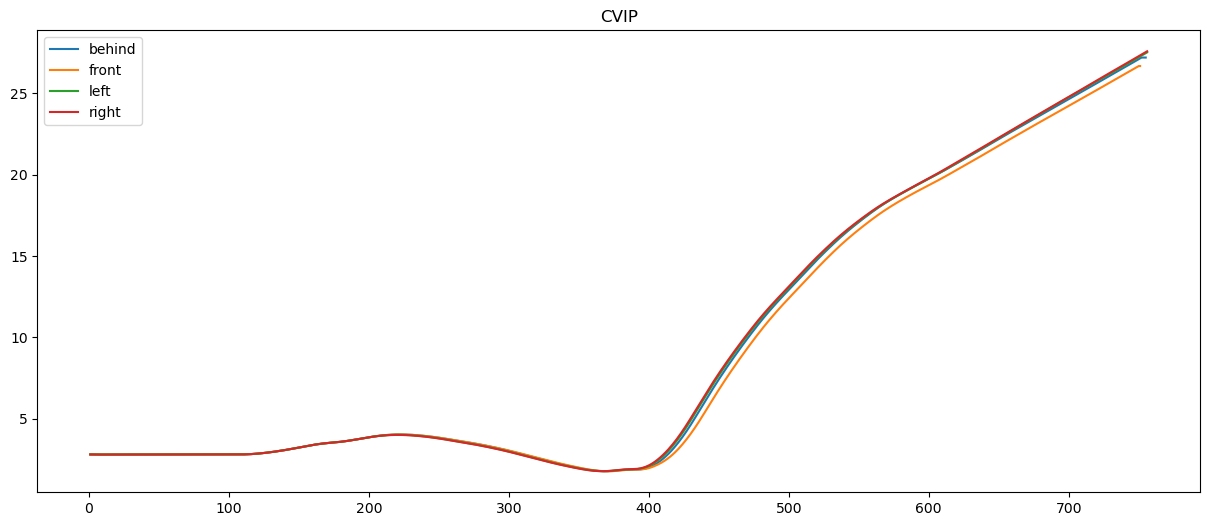

In [82]:
df_cvip_avg_dict = {}
for weather in range(4):
    df_avg = df_array[weather][0]['cvip']
    for i in range(1, len(df_array[weather])): 
        df_avg += df_array[weather][i]['cvip']
    df_avg = df_avg.interpolate().dropna()/100
    df_cvip_avg_dict.update({legend[weather]: df_avg.copy()})
    df_avg = df_avg[1:]
    df_avg.plot(figsize=(15, 6))
    plt.legend(legend)
    plt.title("CVIP")
plt.show()

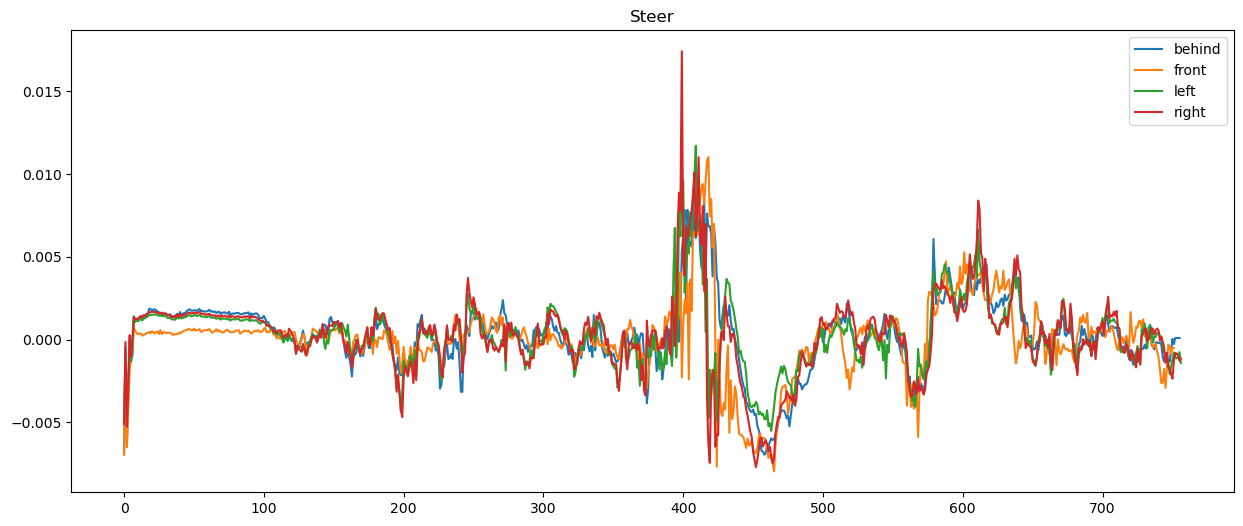

In [83]:
df_steer_avg_dict = {}
for weather in range(4):
    df_avg = df_array[weather][0]['steer']
    for i in range(1, len(df_array[weather])): 
        df_avg += df_array[weather][i]['steer']
    df_avg = df_avg.interpolate().dropna()/100
    df_steer_avg_dict.update({legend[weather]: df_avg.copy()})
    df_avg.plot(figsize=(15, 6))
    df_avg = df_avg[1:]
    plt.legend(legend)
    plt.title("Steer")
plt.show()

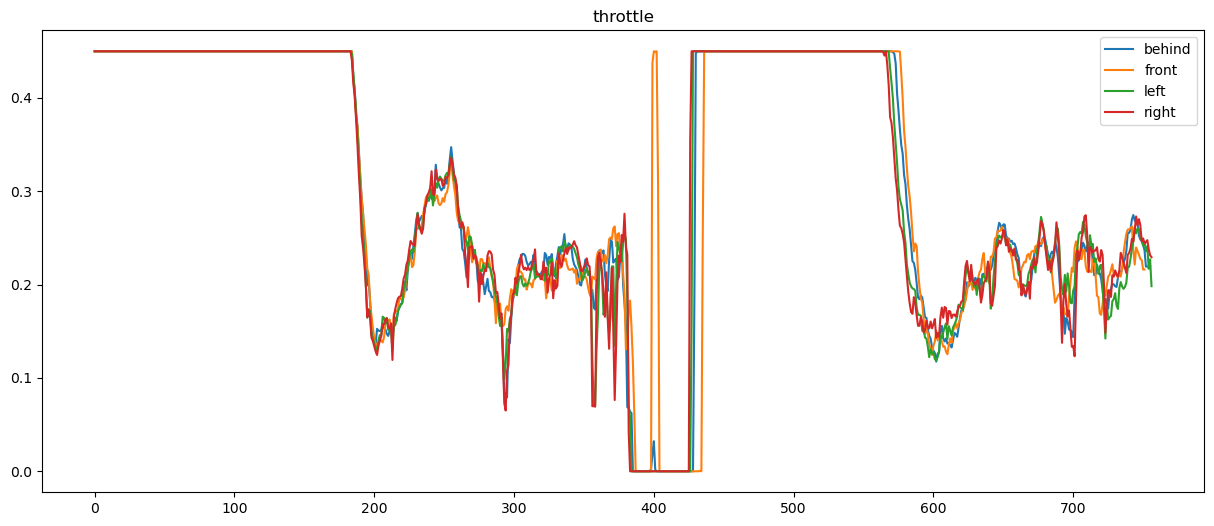

In [84]:
df_throttle_avg_dict = {}
for weather in range(4):
    df_avg = df_array[weather][0]['throttle']
    for i in range(1, len(df_array[weather])): 
        df_avg += df_array[weather][i]['throttle']
    df_avg = df_avg.interpolate().dropna()/100
    df_throttle_avg_dict.update({legend[weather]: df_avg.copy()})
    df_avg.plot(figsize=(15, 6))
    df_avg = df_avg[1:]
    plt.legend(legend)
    plt.title("throttle")
plt.show()

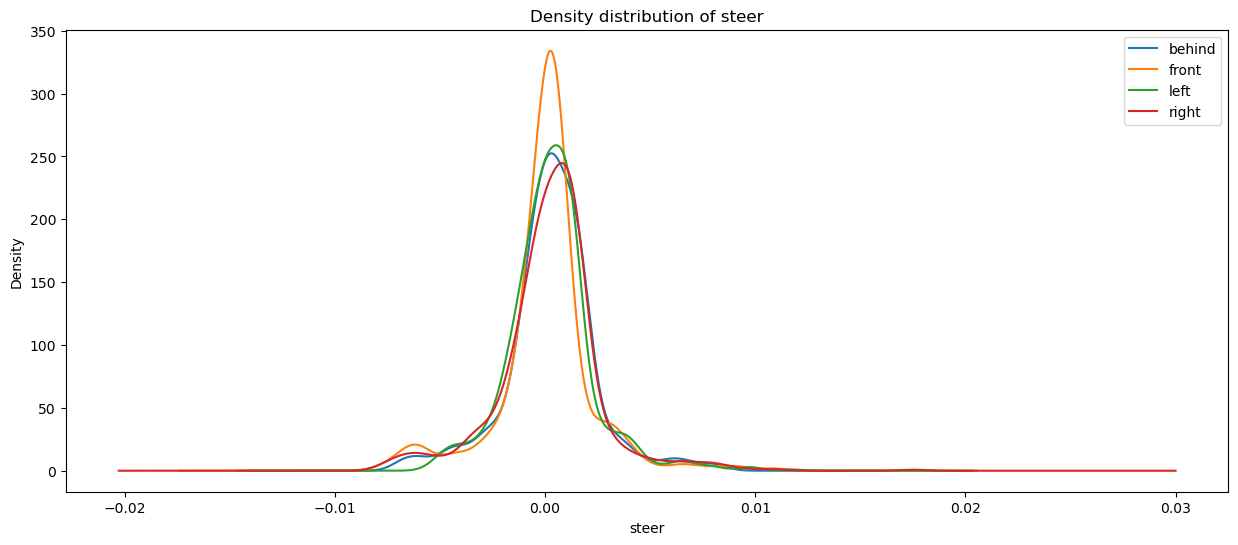

In [78]:
fig = plt.figure(figsize=(15, 6))

for i in legend:
    df_steer_avg_dict[i].plot.density()
plt.xlabel("steer")
plt.title('Density distribution of steer')
plt.legend(legend)
plt.show()

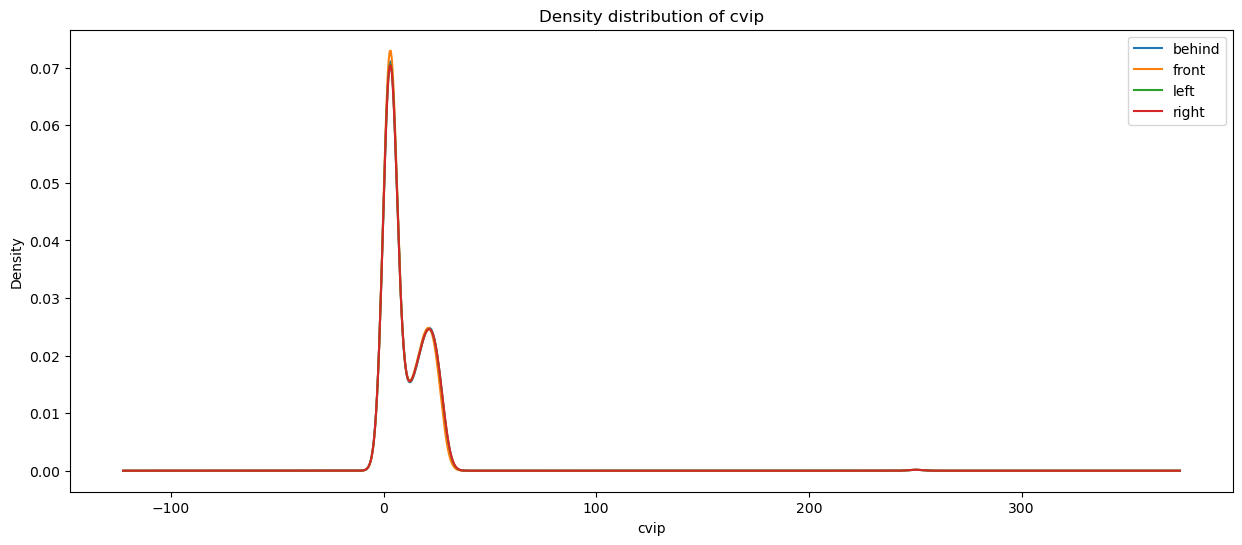

In [79]:
fig = plt.figure(figsize=(15, 6))

for i in legend:
    df_cvip_avg_dict[i].plot.density()
plt.xlabel("cvip")
plt.title('Density distribution of cvip')
plt.legend(legend)
plt.show()

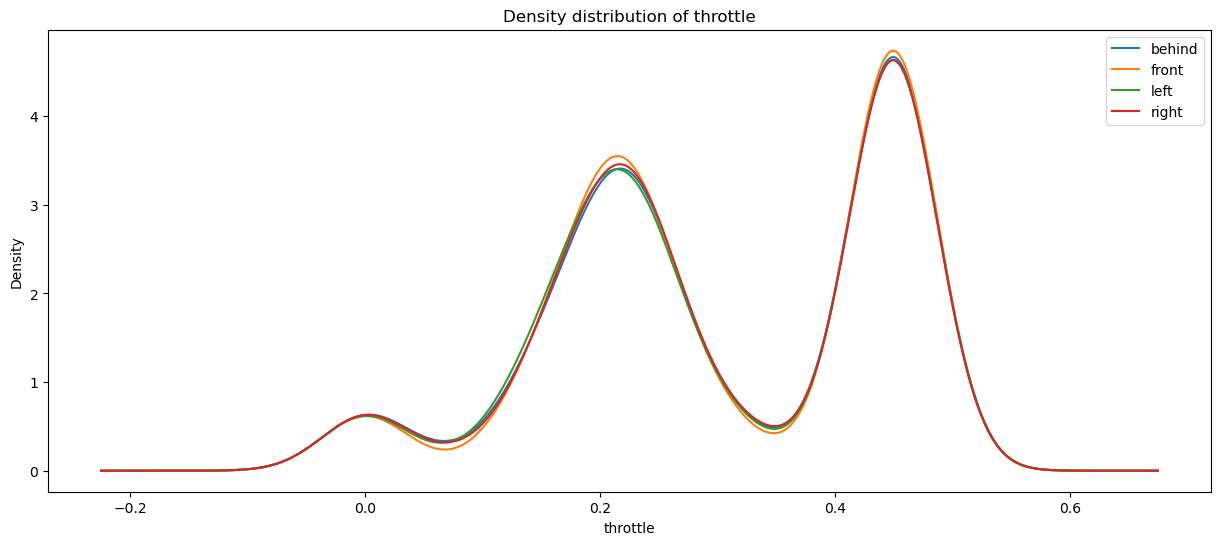

In [80]:
fig = plt.figure(figsize=(15, 6))

for i in legend:
    df_throttle_avg_dict[i].plot.density()
plt.xlabel("throttle")
plt.title('Density distribution of throttle')
plt.legend(legend)
plt.show()